# Introduction

Here in this tutorial, we will create a very simple Python application that can be really useful in various business cases. It will be a simple application, because user can use it through the command prompt window. If you are not looking for fancy GUIs, you can construct your easy-peasy Python application right away and it can make your life a lot easier. You can give up preparing the same analysis over and over again, with different input parameters and save a great deal of your efforts in the long run.  

At work, most people use shared servers with their colleagues. If you are a data scientist and you are deploying models in those servers for the use of your colleagues, this tutorial may help you a lot. Through creating a virtual environment, you can create independent stand-alone models and make your non-technical colleagues use them as applications. Of course, there are many better ways to create perfect applications. IT people can build beautiful GUIs for your model, but the main motivation behind this tutorial is to show you a very simple way to deploy your small analysis scripts into use right away as soon as you are done with them. You can make those scripts executable at every user's Desktop in the server. You don't need your colleagues to have programming background. They can use your simple application through command prompt window by providing the required input and they get the results as a folder created just after the execution.   

I will rely on a single example throughout the tutorial. Here is a business scenario where we need a simple currency exchange rate analysis to get things going with our daily operations at work.

Suppose, my colleagues are interested in getting an idea of where €/$ exchange rate can move in some future and they would like to simulate it daily using Geometric Brownian Motion(GBM). At the end, they can calculate the risk due to currency movements. So, what they need to do is the following.

1. Decide how far to go back in the past and get €/$ rate to calculate daily volatility to be used in GBM algorithm,
2. Decide how far into the future our simulations should go,
3. Decide how many different future scenarios we would like to have,
4. (optional) If I want to try different scenarios based on some daily volatility assumption other than the historical one, I should be able to enter a daily volatility value manually

Above four decisions are input to our simulation algorithm and we want user to be able to appropriately provide them to our program and get the results. In our case, we have two output files:

1. Number of scenarios(supplied by the user) many simulated forward €/$ rates as xlsx, and
2. Combined line graph of the simulated rates over all the scenarios as png

In order to make this an independent desktop application on all of users' Desktops, first, we need to create a virtual Python environment and install all the required packages that our program uses. Then, we can write our script, but the important thing here is to set the generic Desktop path(or a folder in Desktop) as the working directory in our code. So, all operations take place on user's Desktop or a user-created folder on Desktop, and user can have access to output files.

Below, you can see the steps we will follow in the tutorial.

# Steps

1. Creating virtual python environment
2. Installing packages to the virtual environment
3. Creating the script  
    3.1. Setting Desktop folder as the working directory  
    3.2. Getting input from the user  
    3.3. Retrieving exchange rate data from Quandl  
    3.4. Creating simulations using GBM  
    3.5. Plotting the simulated rates and creating .png  
    3.6. Writing the scenarios into .xlsx using xlsxwriter  
    3.7. Collecting the output files into a folder  
    3.8. Re-initiating the program  
4. Creating a shortcut on Desktop for the app  
5. Example run  
6. (Bonus) Adding kernel to Jupyter notebook  

## 1. Creating virtual python environment

Virtual environments are great for managing python versions, packages and dependencies. You can customize a specific environment for a specific project and you avoid any version & dependency problems. Using a single python environment to build many models may not be good practice since different projects may require different packages with different versions and updating a package may corrupt your other models causing things to get out of your control. Depending on this motivation, we may create model or project specific virtual environments and  therefore, we want our script to use default & installed packages from the virtual environment we want. In the later sections of this tutorial, we will explore in more detail how to change the python interpreter that our scripts use.  

Before creating the virtual environment, you have to make sure that you have a working Python installation in the computer or server your are working in and also you have to make sure Python is in the Path. If you have administrator privileges, you can download it from https://www.python.org/downloads/ and during the installation you can add python to the Path variable by checking the appropriate box on the installation screen when it appears (I believe it is the first screen). If you have a python installation, but it is not in the path, you can add it by:
- Control Panel -> System and Security -> System -> Advanced System Settings -> "Environment Variables" (under "Advanced" tab) -> Select "Path" variable under "System variables" box -> Click "Edit" -> Click "New"  
You need to copy and paste two directories:
1. path_to_python\Python37 -> You can edit this with where your Python is installed
2. path_to_python\Python37\Scripts  

![path_var_2.PNG](images/path_var_2.PNG)  

Then, Python gets in the Path and we are ready to create a virtual environment.

Now, we need to create an empty folder to host our virtual environment. For this tutorial, I create a folder named PythonVEnvs on the desktop and inside it, I create another folder named Python_VEnv_FXsimulator. We can create the virtual environment that is specific to our application, inside Python_VEnv_FXsimulator. For other projects, we can just create other folders and dump virtual environments into them.  

You can create the virtual environment anywhere on the server as long as you and users have access permission. When we are done with the script, we will create Desktop shortcut that will use the Python interpreter in our virtual environment. So, permission matter is important.    

Open a command prompt window and type:  
python -m venv path_to_python_environment  
You can find the documentation on https://docs.python.org/3/library/venv.html

![venv_cmd_2.PNG](images/venv_cmd_2.PNG)  

Then, we have a clean virtual environment. Next task is to install required packages.  

![venv_folder_2.PNG](images/venv_folder_2.PNG)  

## 2. Installing packages to the virtual environment

In this tutorial, we need to install below packages:  
1. pandas  
2. numpy  
3. matplotlib  -> to plot scenarios against forward dates  
4. xlsxwriter  -> to write exchange rates for scenarios into Excel  
5. datetime  
6. quandl      -> to retrieve exchange rates through quandl python api  

In order to install these packages into our newly created virtual environment, we should open the command prompt window in Scripts folder of the directory where we set up the virtual environment (or we can open the command prompt and move to the Scripts folder using cd command). In my case, the directory is:  
  
C:\Users\Umut YILDIZ\Desktop\PythonVEnvs\Python_VEnv_FXsimulator\Scripts  

1. Using cd  

![cd_venv.PNG](images/cd_venv_2.PNG)  

2. Opening cmd in the virtual environment  
First, you need to go to the virtual environment folder, then there are two ways to open command prompt window there:  
    1. Right-click the mouse while holding shift button, and then select "Open command window here", or  
    2. Type "cmd" in the address bar and hit enter  
Here is explanation: https://www.thewindowsclub.com/how-to-open-command-prompt-from-right-click-menu  

![cmd_venv.PNG](images/cmd_venv_2.PNG)  

Then, we need to activate our python environment. We can do that by simply typing "activate"    

![act_venv.PNG](images/act_venv_2.PNG)  

At this point, we can use the pip package manager to install the required packages and they will be installed into our virtual environment ("path_to_virtual_environment\Lib\site-packages").  

You can install any package by typing:  
pip install package_name  

In our case, we can install all the required packages at once by typing:  
pip install pandas & pip install matplotlib & pip install xlsxwriter & pip install datetime & pip install quandl  

Note that, when we install pandas, the appropriate numpy version comes with it, so we don't need to install it separately.  

![venv_pip.PNG](images/venv_pip_2.PNG)  

Just to check if the packages are installed correctly, you can type "python" in the command prompt and import the packages to see whether any error pops up.  

![pckg_imp.PNG](images/pckg_imp_2.PNG)  

If you see the above screen, free of errors, you are good to go with the next steps.  

## 3. Creating the script 

At this point, we have a virtual environment with the required packages installed within. Now, we can build our model in a script. To do that, we need to use an editor and in this tutorial, I use Spyder as the IDE to build our model. You can use Jupyter Notebook, Notepad++, Pycharm, VS, etc (any of them is fine). If you would like to continue using your existing editor, you need to make sure that your script uses the Python in the virtual environment we just created as the interpreter. For instance, you can configure that in Spyder under "Tools" -> "Preferences" -> "Python interpreter", as below. This procedure can be a little tricky for Jupyter notebooks. That's why you can find a bonus section on how to add kernel to a Jupyter notebook at the end of this tutorial.

![pyt_intr.PNG](images/pyt_intr.PNG)  

For the sake of completeness of this tutorial, I would like to introduce how to install Spyder as if we are just obtaining an editor for the first time. We will install Spyder into our virtual environment, so we won't need to configure the Python interpreter. The interpreter is, by default, python.exe in "Scripts" folder of the virtual environment, since we install Spyder with our virtual environment as the active environment.  
There are mainly two ways to obtain Spyder:  
1. Get it through Anaconda distribution (This is the easiest way!) (https://www.anaconda.com/distribution/)  
In this first method, you will need to configure the Python interpreter as I explained above.
2. Install it through pip package manager (I use this one and I introduce this method here :) )  
You can find detailed information on: https://docs.spyder-ide.org/installation.html    

In the Spyder installation document, it says installing Spyder through pip can be a little tricky. I tried it and didn't encounter any problem, but I don't completely know what to do in case any problem occurs. Therefore, if things go wrong with your trial, I recommend switching to Anaconda distribution as suggested in the document.    
So, after my warnings, we can just try to install Spyder. It is the same way as if we are installing another package. You need to open command prompt window in the "Scripts" folder of your virtual environment, and then you need to activate the environment simply by typing "activate". We did it before :)  
Then, you should type:  
pip install spyder  

You may wait for a little long for Spyder to finish installing. So, you can just give a break and get a coffee.  

![ins_spy.PNG](images/ins_spy.PNG)  

Hoping that you encountered no error and everything finished smoothly, we can now initialize Spyder to start building our model. To open Spyder, you need to type "spyder3" in the command prompt window right after the installation is complete, or you can find the application(.exe) file within the Scripts folder of our virtual environment and double-click on it.    

![cmd_spy.PNG](images/cmd_spy.PNG)  

After you applied any of the two methods above, the screen below will appear, and the editor screen will open at the end, hopefully :)  

![spy_scr.PNG](images/spy_scr.PNG)  

![spy_edt.PNG](images/spy_edt.PNG)  

Just a last reminder, if things go wrong in any of the steps of installing Spyder through pip, you can just switch to installing it through Anaconda distribution.  

Now, we are ready to write our model step by step. We continue to use the structure depicted in the Steps section of this tutorial. You can copy-paste code snippets from here to your own editor and try running them on your own while following the tutorial.  

So, below is our first code snippet. You remember when we installed the required packages, now it's time to call them in our script, so that we can use their methods when building our model. (We didn't install "os" and "subprocess" as they come with python installation)      

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import quandl
import os
import subprocess
import xlsxwriter
import datetime

### 3.1. Setting Desktop folder as the working directory

Since we are building a desktop application for all users in the server, we need to set our playground to a folder on Desktop (or to Desktop itself). As I mentioned in Introduction of the tutorial, we will see how we can achieve to define a generic way to set our Desktop folder as the working directory, so that this application can run at any user's Desktop without any need to edit the code.  

Using the code below, we can set our working directory to the Desktop for any user. "USERPROFILE" is an environment variable on Windows. It returns the profile of the current user. When we join 'USERPROFILE' with 'Desktop', our path becomes the Desktop directory of the current user and we can set the current working directory by "os.chdir()".   

In [2]:
drctry = os.path.join(os.environ['USERPROFILE'], 'Desktop')
os.chdir(drctry)

![usr_prf.PNG](images/usr_prf.PNG)  

Above picture shows what 'USERPROFILE' environment variable returns. If you type %USERPROFILE% in the address bar, it navigates you to the folder above.  

#### Extra Step

At this point in the script, we create an empty list and throughout the script, we will append some strings to it. This list stores the name of the output files that this code creates. In Introduction section, we said that this model has two output files. This list has the names of those files and at the end of the script, we will use it to consolidate the output files into a single folder.  

In [3]:
output_files = []

### 3.2. Getting input from the user

As explained in detail, we take 4 different input from the user. You can refer back to Introduction section to recall what they are. In the code snippet below, you can see that we try to take input from the user in specific formats and if the user supplies an input with wrong format, it asks the user to enter it again until the correct format is supplied or the user enters 'exit'.  

In [4]:
# 1st Input: Historical Start Date
while True:
    try:
        hist_1_input = input("\nWrite 'exit' to quit!\nFormat for the date: YYYY-MM-DD\nEnter the Historical Start Date: ")
        if hist_1_input == "exit":
            exit()
        else:
            hist_1 = pd.to_datetime(hist_1_input + " 00:00:00", format="%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%d")
        break
    except ValueError:
        print("\nENTER A VALID DATE !\n")

# 2nd Input: Forward End Date
while True:
    try:
        fwd_2_input = input("\nWrite 'exit' to quit!\nFormat for the date: YYYY-MM-DD\nEnter the Forward End Date: ")
        if fwd_2_input == "exit":
            exit()
        else:
            fwd_2 = pd.to_datetime(fwd_2_input + " 00:00:00", format="%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%d")
        break
    except ValueError:
        print("\nENTER A VALID DATE !\n")
        
# 3rd Input: Number of Scenarios
while True:
    try:
        scen_size = input("\nWrite 'exit' to quit!\nNumber of scenarios should be an integer !\nEnter the Number of Scenarios you want to run: ")
        if scen_size == "exit":
            exit()
        elif float(scen_size) / int(scen_size) == 1:
            scen_size = int(scen_size)
            break
    except ValueError:
        print("\nENTER A INTEGER !\n")
        
# 4th Input: Implied Volatiliy
while True:
    try:
        implied_volatility = input("\nWrite 'exit' to quit!\nFor automatic volatility calculation, write \'omit\' !\n" +
                                "Implied Volatility value should be given as a percentage in decimal format, e.g. 0.01 !\n" + "Enter the Implied Volatility: ")
        if implied_volatility == "exit":
            exit()
        elif implied_volatility == 'omit':
            implied_volatility_check = False
            break
        else:
            implied_volatility_check = True
            implied_volatility = float(implied_volatility)
            break
    except ValueError:
        print("\nENTER A VALID IMPLIED VOLATILITY !\n")
        
hist_start = pd.to_datetime(hist_1, format = "%Y-%m-%d")
hist_end = pd.to_datetime(pd.to_datetime('today').strftime("%Y-%m-%d"), format = "%Y-%m-%d") - pd.Timedelta('1 days')

start =  pd.to_datetime(pd.to_datetime('today').strftime("%Y-%m-%d"), format = "%Y-%m-%d")
end = pd.to_datetime(fwd_2, format = "%Y-%m-%d")


Write 'exit' to quit!
Format for the date: YYYY-MM-DD
Enter the Historical Start Date: 2019-01-01

Write 'exit' to quit!
Format for the date: YYYY-MM-DD
Enter the Forward End Date: 2019-12-31

Write 'exit' to quit!
Number of scenarios should be an integer !
Enter the Number of Scenarios you want to run: 100

Write 'exit' to quit!
For automatic volatility calculation, write 'omit' !
Implied Volatility value should be given as a percentage in decimal format, e.g. 0.01 !
Enter the Implied Volatility: omit


Above is a sample run for this code snippet. The user interacts with the input screen in the way seen above. You can find the interpretation below.  
  
1. Historical Start Date:  
If the user omits manually entering an implied volatiliy, the model calculates a daily volatility for dates starting from Historical Start Date ending at one day before today. So suppose, today is (12 Aug, 2019) and we enter (1 Jan, 2019) as the Historical Start Date. The model calculates daily volatility from range (1 Jan, 2019) - (9 Aug, 2019) (only weekdays).  
  
  
2. Forward End Date:  
It is the last date our simulations will reach to. For instance, suppose today is (12 Aug, 2019) and we enter (31 Dec, 2019) as the Forward End Date. The model simulates the exchange rates for range (13 Aug, 2019) - (31 Dec, 2019) (only weekdays). Note that, our model considers today as a forward date since the day has not ended yet and we can't get exchange rate data (more on this in later sections).  
  
  
3. Number of Scenarios:  
This is the number of exchange rate scenarios for the future date range the user provided. If it is 100, the model creates 100 different paths for the exchange rate using Geometric Browninan Motion.  
  
  
4. Implied Volatility:  
If the user wants to try out her/his own daily volatility value to simulate rates, she/he can enter that value here. If the wants the model to calculate daily volatility from historical data, she/he can just type 'omit' here.  

!!! One thing important to note here is that historical exchange rate data exists only for weekdays. So, our model ignores weekends and treats a week as if it only consists of weekdays (The week ends with Friday and starts with Monday).  

### 3.3. Retrieving exchange rate data from Quandl

We retrieve EUR/USD exchange rate data from Quandl using the data product European Central Bank. Quandl provides a Python package named "quandl" and we extract data using "get" method from that package. We already installed the quandl package in step 3.1. Now, we need to obtain an authorization token from Quandl to pass it as an argument to the get method. You need to sign up to Quandl first, then when you go to the link below and click on "PYTHON" under "Libraries", you will see your authorization token.  

Link: https://www.quandl.com/data/ECB/EURUSD-EUR-vs-USD-Foreign-Exchange-Reference-Rate  

![quandl.PNG](images/quandl.PNG)  

![quandl_auth.PNG](images/quandl_auth.PNG)  

After you get the authorization token, you are ready to go with the script again. Below code gets the data, converts it to EUR/USD and stores it as pandas dataframe in "USDdata" with two columns -> "Date": day and "USD": EUR/USD rate  

In [5]:
eur_usd = quandl.get("ECB/EURUSD", authtoken="your_authorization_token", start_date = hist_start.strftime("%Y-%m-%d"))

USDdata = (1 / eur_usd).reset_index()
USDdata.columns = ['Date', 'USD']

USDdata["Date"] = pd.to_datetime(USDdata["Date"], format = "%Y-%m-%d")
print("\nUSD Data Retrieved - Information:\n")
print(USDdata.info())
print("--------------------------------------------------------------------------------")


USD Data Retrieved - Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
Date    155 non-null datetime64[ns]
USD     155 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB
None
--------------------------------------------------------------------------------


In [6]:
print(USDdata.head())
print(USDdata.tail())

        Date       USD
0 2019-01-02  0.877424
1 2019-01-03  0.881213
2 2019-01-04  0.876962
3 2019-01-07  0.873744
4 2019-01-08  0.874126
          Date       USD
150 2019-08-05  0.894294
151 2019-08-06  0.893895
152 2019-08-07  0.892698
153 2019-08-08  0.893416
154 2019-08-09  0.893017


### 3.4. Creating simulations using GBM  

At this point in the tutorial, we have the historical exchange rate data as it can be seen above. Now, it is time to use discrete-time Geometric Brownian Motion(GBM) model to generate forward exchange rate scenarios. I won't discuss the details of how to create simulations using GBM. It is out of scope for this tutorial. I want to focus only on details of designing the desktop application. However, here is the link for my article in which you can find a thorough explanation of how to create future prediction series using discrete-time Geometric Brownian Motion, with Python codes. In the article, I use a stock price example, but the code can be easily translated to our problem here. If you want to know more about GBM, I recommend you to read that article some time. You don't necessarily need to read it for completing this tutorial. Below is the plug-and-play GBM code that we can use to simulate exchange rates.  

Geometric Brownian Motion with Python:  
[GitHub Link](https://github.com/yildizumut/Discrete-Time-Geometric-Brownian-Motion-Simulation-with-Python/blob/master/Geometric_Brownian_Motion.md)

In [7]:
# Daily returns of the historical exchange rates
returns = (USDdata.loc[1:, 'USD'] - USDdata.shift(1).loc[1:, 'USD']) / USDdata.shift(1).loc[1:, 'USD']

print("\n\no-o-o-o-o-o-o-o-o-o-o-o PROGRAM INITIATED o-o-o-o-o-o-o-o-o-o-o-o\n")
# Geometric Brownian Motion

# Parameter Definitions
# So    :   initial exchange rate (yesterday's exchange rate)
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
# N     :   number of time points in prediction the time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# W     :   array for brownian path
# b     :   array for brownian increments

# Parameter Assignments
So = USDdata["USD"].values[USDdata.shape[0]-1]
dt = 1 # 1 day
T = pd.Series(pd.date_range(start, end)).map(lambda x: # Length of the prediction time horizon, same unit with dt
                                             1 if x.isoweekday() in range(1,6) else 0).sum() # only weekdays
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = [implied_volatility if implied_volatility_check else np.std(returns)][0]
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}

print("\n-> GBM is progressing !")
# Prediction with GBM
drift = (mu - 0.5 * sigma**2) * t
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))



o-o-o-o-o-o-o-o-o-o-o-o PROGRAM INITIATED o-o-o-o-o-o-o-o-o-o-o-o


-> GBM is progressing !


Output of the GBM code is a nump array named S. It contains the predicted exchange rates for all of the scenarios, as well as the So value. Remember that it is the user who declares how many scenarios she/he wants as an input(scen_size). So, S contains scen_size many scenarios with each scenario having length N exchange rate series(N again comes from the user's input of forward end date).  

The next step in our application is reporting the results in useful formats. As stated in Introduction, we have two output files and in the next sections we will learn how to create them.  

### 3.5. Plotting the simulated rates and creating .png

Our first output is combined line plot of all the scenarios that have been created. The code snippet below first creates the plot by sequentially adding each of the scenarios. Then, it saves the whole plot as .png file on the Desktop. Also, we append name of the saved .png file to output_files list. Later in the tutorial, we will use this list to gather all the output files into a single folder.  


-> Simulation results and graph are being created !


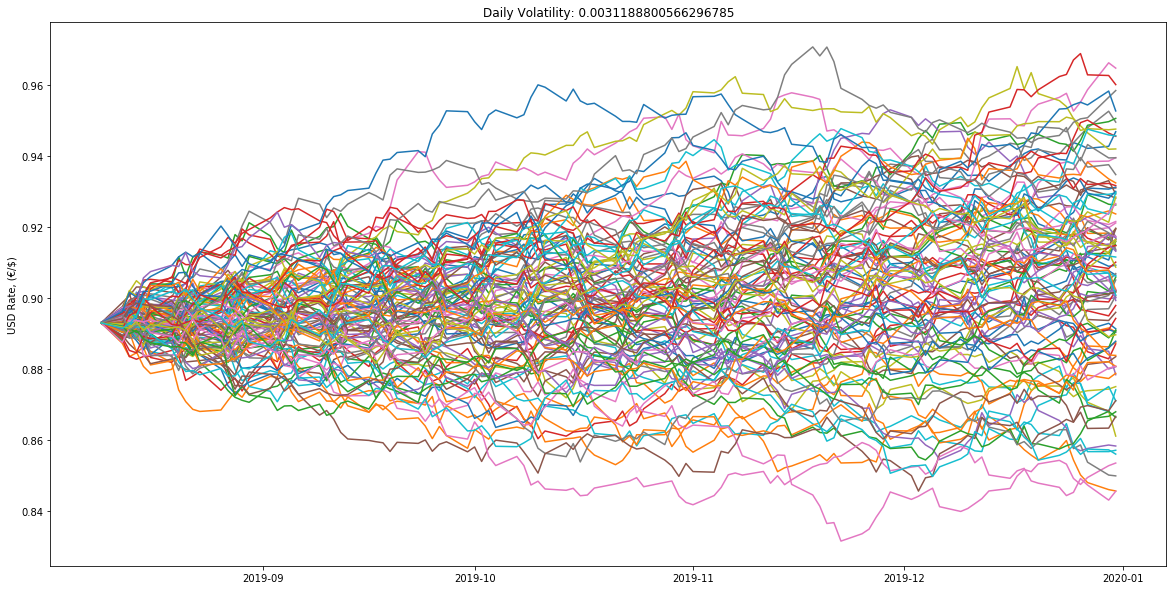

In [8]:
# Plotting the simulations
plt.figure(figsize = (20,10))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma / np.sqrt(1 / dt)))
    plt.plot(pd.date_range(start = USDdata["Date"].max(), end = end, freq = 'D').map(lambda x: 
                                                                    x if x.isoweekday() in range(1,6) else np.nan).dropna()
             ,S[i, :])
    plt.ylabel('USD Rate, (€/$)')

# Saving the plot as .png file into drctry which is Desktop in our case
# Name of the plot is FX_Sim_Graph_(prediction_start_date)_to_(prediction_end_date).png
print("\n-> Simulation results and graph are being created !")
figure_name = "FX_Sim_Graph_" + start.strftime("%d%m%Y") + "_to_" + end.strftime("%d%m%Y") + ".png"
output_files.append(figure_name)
plt.savefig(drctry + "\\" + figure_name)

### 3.6. Writing the scenarios into .xlsx using xlsxwriter

Our second output is an Excel file where we explicitly display all the scenarios and all the predictions. We create the Excel file, because it is the main input to our sensitivity analysis. Remember the business scenario we discussed in Introduction Section, we need to get prediction values from each scenario to be able to calculate the risk. That's why we extract array S to an .xlsx file. To create the Excel file, we use xlsxwriter package in Python.  

Remember from Section 3.2. that predictions are done only for the weekdays. Our assumption is that a week is composed only of weekdays. That's why when we get a prediction series from our GBM model which starts at (12 Aug, 2019) and ends at (31 Dec, 2019), there will be 101 predictions in a scenario. There are 141 days between (12 Aug, 2019) and (31 Dec, 2019), of which 40 days are weekends and 101 days are weekdays. Since our model excludes weekends and we want a complete date range, we need to add the weekends into our prediction series. We do that by making another assumption. We just copy and paste the exchange rate value of Friday to the weekend days coming after that. By this way, we obtain a complete prediction time horizon with weekends having the exchange rate value of previous Friday. In the first part of the code below, we perform this operation through getting weekend indices.  

In the second part of the code, we create an Excel file named as Daily_FX_Simulations_(prediction_start_date)_to_(prediction_end_date).xlsx and also append this name to the output_files list, as we did for .png file in the previous section.  

Then, we create the first column by writing the scenario numbers to rows. After that, we write dates of the prediction horizon in the first row as headers. In the last step, we just write each scenario to its corresponding row using a for loop.  

In [9]:
# Create a sequence of dates between start and end that includes also the weekends
# Weekend FX rates will be equal to the most recent weekday FX rate
S_wknd = np.copy(S)

all_fwd_dates = pd.Series(pd.date_range(USDdata["Date"].max(), end))
wknd_check = all_fwd_dates.map(lambda x: 1 if x.isoweekday() in range(6,8) else 0)
wknd_indices = wknd_check[wknd_check == 1].index

for i in wknd_indices:
    S_wknd = np.insert(S_wknd, i, S_wknd[:,i-1], axis = 1)

excel_name = "Daily_FX_Simulations_" + start.strftime("%d%m%Y") + "_to_" + end.strftime("%d%m%Y") + ".xlsx"
output_files.append(excel_name)

# Create the Excel file
workbook = xlsxwriter.Workbook(drctry + "\\" + excel_name) # On the Desktop with the name assigned just above
worksheet = workbook.add_worksheet() # add a worksheet

worksheet.write(0, 0, "Scenario") 
worksheet.write_column(1, 0, np.arange(1, scen_size + 1)) # Scenario numbers
worksheet.write_row(0, 1, pd.Series(pd.date_range(USDdata["Date"].max(), end)).map(lambda x: 
                                                                      x.strftime("%Y-%m-%d"))) # prediction time horizon

col = 1
for row, data in enumerate(S_wknd):
    worksheet.write_row(row + 1, col, data) # append each scenario to the related row

workbook.close()

At the end, what we have is an Excel file like below. Rows are scenarios and columns are predictions for each day in the prediction time horizon. The picture below is upper-left part of the Excel file.  

![excel_sim.PNG](images/excel_sim.PNG)  

The picture below is lower-right part of the Excel file. As you can see, number of scenarios goes up to 100 and the prediction time horizon goes up to (31 Dec, 2019).  

![excel_sim2.PNG](images/excel_sim2.PNG)  

### 3.7. Collecting the output files into a folder

After we are done with creating the output files, we gather them into a single folder and give a unique name to that folder so that the user can distinguish different runs from each other. Name of the folder is:  
From_(prediction_start_date)_to_(prediction_end_date)_RunDate_(current_time)  

1. os.makedirs() creates a folder with the name we want.  
2. os.rename() changes the directory of all the files in output_files. Their new directory becomes the folder we just created.  

In [10]:
cur_time = "From_" + start.strftime("%d%m%Y") + "_to_" + end.strftime("%d%m%Y") + "_RunDate_" + datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
print("Name of the folder:", cur_time)
os.makedirs(drctry + "\\" + cur_time)

for carry in output_files:
    os.rename(drctry + "\\" + carry, drctry + "\\" + cur_time + "\\" + carry)

print("\n\no-o-o-o-o-o-o-o-o-o-o-o CODE RUN COMPLETED o-o-o-o-o-o-o-o-o-o-o-o")

Name of the folder: From_11082019_to_31122019_RunDate_2019_08_11_08_31_11


o-o-o-o-o-o-o-o-o-o-o-o CODE RUN COMPLETED o-o-o-o-o-o-o-o-o-o-o-o


What we have at the end is a folder like in the below picture.  

![out_folder.PNG](images/out_folder.PNG)  

### 3.8. Re-initiating the program 

At this point, our Desktop application is complete. One last thing we will do before finishing the script is writing a code snippet that will give the user option of re-initiating the program or exiting it. The code below first gets the directory where our script is running. Then, it asks the user whether she/he wants to run the program again. If the user answers 'yes', the script is initiated again using subprocess.call(). There are two important points here:  

1. After finishing the script, we should save it into the Virtual Python Environment we created at the beginning of this tutorial. This must be done, because it will make the code below work correctly at any computer.  
2. Name of the script is important, because we use that name below in the code, to re-initiate the program.  

These two aspects are so important. For this tutorial, remember that the Virtual Python Environment we created was:  

C:\Users\Umut YILDIZ\Desktop\PythonVEnvs\Python_VEnv_FXsimulator.  

So, we should save our script into that folder. Name of our script is FX_Simulator.py. As it can be seen in the picture below, we saved it into the virtual environment.  

In [ ]:
pydir = os.path.dirname(os.path.realpath(__file__))
cmd_run = '"' + pydir + '\\Scripts\\python.exe" ' + '"' + pydir + '\\FX_Simulator.py"'

while True:
    run_again = input("\nDo you want to run the program again ? (yes / no): ")
    if run_again == "yes":
        subprocess.call(cmd_run)
        break
    elif run_again == "no":
        break

![scrpt_venv.PNG](images/scrpt_venv.PNG)  

The application is almost complete at this point. Now, we have a Virtual Python Environment with all the necessary packages installed, we have our script in the virtual environment that uses Desktop as the working directory. The last step is to create a shortcut for our application and maybe a logo.  

## 4. Creating a shortcut on Desktop for the app

To create a shortcut on the Desktop:  

1. Right click on the Desktop  
2. Clik New  
3. Click Shortcut  

Then you will see the dialog box below:  

![shrhtct.PNG](images/shrhtct.PNG)  

4. In the box, you should write this:  

path_to_your_virtual_environment\Scripts\python.exe path_to_your_virtual_environment\name_of_the_scripty.py  

For the tutorial, I should write the following:  
"C:\Users\Umut YILDIZ\Desktop\PythonVEnvs\Python_VEnv_FXsimulator\Scripts\python.exe" "C:\Users\Umut YILDIZ\Desktop\PythonVEnvs\Python_VEnv_FXsimulator\FX_simulator.py"  

First directory is the directory of python.exe in the virtual environment. Then, you should leave a blank and write the directory of the script.  

5. Click Next and give a name to the shortcut.  

![shrtct_name.PNG](images/shrtct_name.PNG)  

6. Click Finish  

That's it. The shortcut is ready. You can go ahead and try running the Desktop application.  

After this point, you can move the Virtual Python Environment folder anywhere you want, another folder in your computer, your friend's computer. The only thing you should do is creating a shortcut as we just did here. Write the correct directories, give  a name and click Finish!  

You can also use a logo for the application.  

1. Go to https://www.iconfinder.com/free_icons  
2. Download the icon you like in .ico format  
3. Save it to your Python Virtual Environment, next to the script  
4. Then, right click to the Desktop shortcut
5. Click Properties
6. Click Change Icon  
7. Click Browse  
8. Go to the Python Virtual Environment and select the logo  
9. Then, finish the process  

Below is the Desktop shortcut for the application we created in this tutorial.  

![shr_ico.PNG](images/shr_ico.PNG)  

# Conclusion  

In this tutorial, we learnt how to create a very simple Python desktop application without any GUI. I tried to elaborate as much as possible at each step and I believe what you learn in those steps we covered can help you in your other projects as well. The final folder after all the steps are completed is the folder in the picture below:  

![fin_folder.PNG](images/fin_folder.PNG)  

This is the Virtual Python Environment. It has our script we created in the sections above and it has also a logo for the Desktop shortcut. You can move this folder to anywhere you want. You should just create a new Desktop shortcut whenever you move it(I mean you should just repeat Section 4). Our script uses the Desktop as the working directory and output files will be stored in a folder on the Desktop.  

You can do whatever you want with the knowledge you got throughout this tutorial. We did GBM simulation for exchange rates, but you can do so many other things. You can prepare a reporting tool and give it to your colleague who is not involved in programming. This is the main motivation behind this tutorial. When we write code for a problem, it may be difficult for users who don't have a programming background to understand it. To overcome this problem, creating a user interface and turning the script into an application can be a solution. However, it may be time consuming to create fancy Graphical User Interfaces. In this tutorial, I wanted to show you that we can create very simple applications, that can interact with the user, within minutes.  

## 5. Example run 

Below is the Youtube video link of a sample run of our program. It starts a little bit late around 00:15. Sorry for that :)    

[![Alt text](http://i3.ytimg.com/vi/tLnSHFOODYs/hqdefault.jpg)](https://youtu.be/tLnSHFOODYs)  

Before ending the tutorial, I would like to share with you the full code without the last part for re-initiating the program. You can take it from Section 3.8.  


Write 'exit' to quit!
Format for the date: YYYY-MM-DD
Enter the Historical Start Date: 2019-01-01

Write 'exit' to quit!
Format for the date: YYYY-MM-DD
Enter the Forward End Date: 2019-12-31

Write 'exit' to quit!
Number of scenarios should be an integer !
Enter the Number of Scenarios you want to run: 100

Write 'exit' to quit!
For automatic volatility calculation, write 'omit' !
Implied Volatility value should be given as a percentage in decimal format, e.g. 0.01 !
Enter the Implied Volatility: omit

USD Data Retrieved - Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
Date    155 non-null datetime64[ns]
USD     155 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB
None
--------------------------------------------------------------------------------
        Date       USD
0 2019-01-02  0.877424
1 2019-01-03  0.881213
2 2019-01-04  0.876962
3 2019-01-07  0.873744
4 2019-01-08  0.874126
   

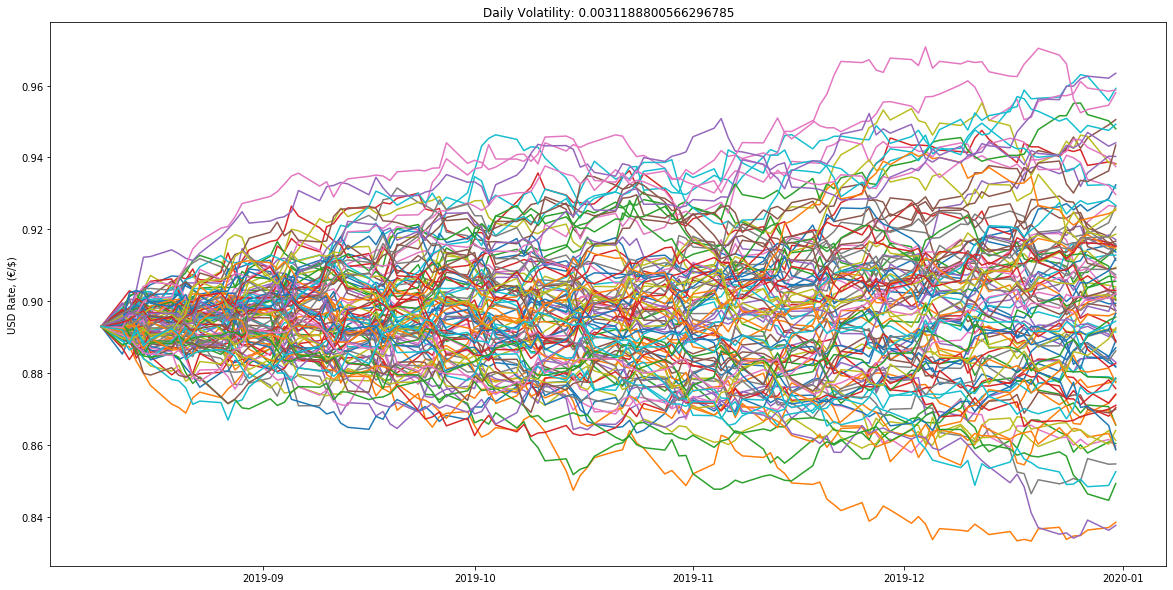

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import quandl
import os
import xlsxwriter
import datetime

# Setting Desktop folder as the working directory
drctry = os.path.join(os.environ['USERPROFILE'], 'Desktop')
os.chdir(drctry)

output_files = []

# Getting input from the user
# 1st Input: Historical Start Date
while True:
    try:
        hist_1_input = input("\nWrite 'exit' to quit!\nFormat for the date: YYYY-MM-DD\nEnter the Historical Start Date: ")
        if hist_1_input == "exit":
            exit()
        else:
            hist_1 = pd.to_datetime(hist_1_input + " 00:00:00", format="%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%d")
        break
    except ValueError:
        print("\nENTER A VALID DATE !\n")

# 2nd Input: Forward End Date
while True:
    try:
        fwd_2_input = input("\nWrite 'exit' to quit!\nFormat for the date: YYYY-MM-DD\nEnter the Forward End Date: ")
        if fwd_2_input == "exit":
            exit()
        else:
            fwd_2 = pd.to_datetime(fwd_2_input + " 00:00:00", format="%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%d")
        break
    except ValueError:
        print("\nENTER A VALID DATE !\n")
        
# 3rd Input: Number of Scenarios
while True:
    try:
        scen_size = input("\nWrite 'exit' to quit!\nNumber of scenarios should be an integer !\nEnter the Number of Scenarios you want to run: ")
        if scen_size == "exit":
            exit()
        elif float(scen_size) / int(scen_size) == 1:
            scen_size = int(scen_size)
            break
    except ValueError:
        print("\nENTER A INTEGER !\n")
        
# 4th Input: Implied Volatiliy
while True:
    try:
        implied_volatility = input("\nWrite 'exit' to quit!\nFor automatic volatility calculation, write \'omit\' !\n" +
                                "Implied Volatility value should be given as a percentage in decimal format, e.g. 0.01 !\n" + "Enter the Implied Volatility: ")
        if implied_volatility == "exit":
            exit()
        elif implied_volatility == 'omit':
            implied_volatility_check = False
            break
        else:
            implied_volatility_check = True
            implied_volatility = float(implied_volatility)
            break
    except ValueError:
        print("\nENTER A VALID IMPLIED VOLATILITY !\n")
        
hist_start = pd.to_datetime(hist_1, format = "%Y-%m-%d")
hist_end = pd.to_datetime(pd.to_datetime('today').strftime("%Y-%m-%d"), format = "%Y-%m-%d") - pd.Timedelta('1 days')

start =  pd.to_datetime(pd.to_datetime('today').strftime("%Y-%m-%d"), format = "%Y-%m-%d")
end = pd.to_datetime(fwd_2, format = "%Y-%m-%d")

# Retrieving exchange rate data from Quandl
eur_usd = quandl.get("ECB/EURUSD", authtoken="your_authorization_token", start_date = hist_start.strftime("%Y-%m-%d"))

USDdata = (1 / eur_usd).reset_index()
USDdata.columns = ['Date', 'USD']

USDdata["Date"] = pd.to_datetime(USDdata["Date"], format = "%Y-%m-%d")
print("\nUSD Data Retrieved - Information:\n")
print(USDdata.info())
print("--------------------------------------------------------------------------------")

print(USDdata.head())
print(USDdata.tail())

# Creating simulations using GBM
# Daily returns of the historical exchange rates
returns = (USDdata.loc[1:, 'USD'] - USDdata.shift(1).loc[1:, 'USD']) / USDdata.shift(1).loc[1:, 'USD']

print("\n\no-o-o-o-o-o-o-o-o-o-o-o PROGRAM INITIATED o-o-o-o-o-o-o-o-o-o-o-o\n")
# Geometric Brownian Motion

# Parameter Definitions
# So    :   initial exchange rate (yesterday's exchange rate)
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
# N     :   number of time points in prediction the time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# W     :   array for brownian path
# b     :   array for brownian increments

# Parameter Assignments
So = USDdata["USD"].values[USDdata.shape[0]-1]
dt = 1 # 1 day
T = pd.Series(pd.date_range(start, end)).map(lambda x: # Length of the prediction time horizon, same unit with dt
                                             1 if x.isoweekday() in range(1,6) else 0).sum() # only weekdays
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = [implied_volatility if implied_volatility_check else np.std(returns)][0]
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}

print("\n-> GBM is progressing !")
# Prediction with GBM
drift = (mu - 0.5 * sigma**2) * t
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S))

# Plotting the simulated rates and creating .png
# Plotting the simulations
plt.figure(figsize = (20,10))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma / np.sqrt(1 / dt)))
    plt.plot(pd.date_range(start = USDdata["Date"].max(), end = end, freq = 'D').map(lambda x: 
                                                                    x if x.isoweekday() in range(1,6) else np.nan).dropna()
             ,S[i, :])
    plt.ylabel('USD Rate, (€/$)')

# Saving the plot as .png file into drctry which is Desktop in our case
# Name of the plot is FX_Sim_Graph_(prediction_start_date)_to_(prediction_end_date).png
print("\n-> Simulation results and graph are being created !")
figure_name = "FX_Sim_Graph_" + start.strftime("%d%m%Y") + "_to_" + end.strftime("%d%m%Y") + ".png"
output_files.append(figure_name)
plt.savefig(drctry + "\\" + figure_name)

# Writing the scenarios into .xlsx using xlsxwriter
# Create a sequence of dates between start and end that includes also the weekends
# Weekend FX rates will be equal to the most recent weekday FX rate
S_wknd = np.copy(S)

all_fwd_dates = pd.Series(pd.date_range(USDdata["Date"].max(), end))
wknd_check = all_fwd_dates.map(lambda x: 1 if x.isoweekday() in range(6,8) else 0)
wknd_indices = wknd_check[wknd_check == 1].index

for i in wknd_indices:
    S_wknd = np.insert(S_wknd, i, S_wknd[:, i-1], axis = 1)

excel_name = "Daily_FX_Simulations_" + start.strftime("%d%m%Y") + "_to_" + end.strftime("%d%m%Y") + ".xlsx"
output_files.append(excel_name)

# Create the Excel file
workbook = xlsxwriter.Workbook(drctry + "\\" + excel_name) # On the Desktop with the name assigned just above
worksheet = workbook.add_worksheet() # add a worksheet

worksheet.write(0, 0, "Scenario") 
worksheet.write_column(1, 0, np.arange(1, scen_size + 1)) # Scenario numbers
worksheet.write_row(0, 1, pd.Series(pd.date_range(USDdata["Date"].max(), end)).map(lambda x: 
                                                                      x.strftime("%Y-%m-%d"))) # prediction time horizon

col = 1
for row, data in enumerate(S_wknd):
    worksheet.write_row(row + 1, col, data) # append each scenario to the related row

workbook.close()

# Collecting the output files into a folder
cur_time = "From_" + start.strftime("%d%m%Y") + "_to_" + end.strftime("%d%m%Y") + "_RunDate_" + \
                                            datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
os.makedirs(drctry + "\\" + cur_time)

for carry in output_files:
    os.rename(drctry + "\\" + carry, drctry + "\\" + cur_time + "\\" + carry)

print("\n\no-o-o-o-o-o-o-o-o-o-o-o CODE RUN COMPLETED o-o-o-o-o-o-o-o-o-o-o-o")

## 6. (Bonus) Adding kernel to Jupyter notebook

In this section, we learn how to add a new kernel to Jupyter notebook and select the python.exe in our virtual environment as the interpreter, so that we can solely use the packages that we installed into the virtual environment and have a better control over our model.  

Since we are going to use a new kernel in our virtual environment, we should manually install "ipykernel" into our virtual environment. To do this, we need to open command prompt in "Scripts" folder of our virtual environment and activate it. You can refer back to Section 2 for this. After doing that, we can install "ipykernel" by typing:  
pip install ipykernel  

You can find detailed information on: https://ipython.readthedocs.io/en/stable/install/kernel_install.html

![ipy_inst.PNG](images/ipy_inst.PNG)  

Now, our virtual environment has the IPython backend to be used by Jupyter notebook. Next step is to add our virtual environment to Jupyter. We can add it by typing the below command:  
python -m ipykernel install --user --name env_name --display-name "Env Name"  
For env_name, you can type any name you want for your virtual environment. Display name is the name displayed on Jupyter when picking kernels.

In our case, the above command can be something like below:  
python -m ipykernel install --user --name python_venv_fxsimulator --display-name "Python_VEnv_FXsimulator"  

![ipy_jupy.PNG](images/ipy_jupy.PNG)  

"Installed kernelspec python_venv_fxsimulator in C:\Users\Umut YILDIZ\AppData\Roaming\jupyter\kernels\python_venv_fxsimulator"  
This statement indicates where the kernel specs are installed so that Jupyter can display it to us and we can pick it on the notebook. If you navigate to there, you see a "kernel.json" file.  

![kern_jsn.PNG](images/kern_jsn.PNG)  

When you open this file with a text editor, what you will see is the json text below:  

![kern_jsn_ins.PNG](images/kern_jsn_ins.PNG)  

You can see from the highlighted line that it is the path to the python interpreter in our virtual environment. Now, last step is to pick our virtual environment from the Jupyter notebook.  

![jupy_pick.PNG](images/jupy_pick.PNG)  

![kern_dsp.PNG](images/kern_dsp.PNG)  

That's it. We can now write our script using the virtual environment we created :)